<a href="https://colab.research.google.com/github/AtharvaJejurkar/machine-learning/blob/main/Dataset_Drug_Inventory_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
np.random.seed(42)

n_samples = 5000

data = {
    'product_id': [f'P{i:04d}' for i in range(n_samples)],
    'category': np.random.choice(['Cough Syrup', 'Antibiotic', 'Vitamin', 'Painkiller', 'Generic'], n_samples),
    'days_in_stock': np.random.exponential(60, n_samples).astype(int),
    'weekly_sales_30d': np.random.poisson(15, n_samples),
    'stock_qty': np.random.poisson(100, n_samples),
    'discounts_tried': np.random.poisson(1, n_samples),
    'season_match': np.random.uniform(0.3, 1.5, n_samples),
    'price_reductions': np.random.poisson(2, n_samples)
}

df = pd.DataFrame(data)

In [15]:
# ENGINEER DEAD STOCK LABELS (Your ML target)
df['sales_velocity'] = df['weekly_sales_30d'] / 4
df['stock_sales_ratio'] = df['stock_qty'] / df['sales_velocity'].clip(1)
df['aging_risk'] = (df['days_in_stock'] > 90).astype(int)
df['discount_fail'] = (df['discounts_tried'] > 2).astype(int)
df['low_demand'] = (df['sales_velocity'] < 2).astype(int)

In [16]:
# Dead stock probability formula (industry standard)
df['dead_stock_risk'] = (
    0.4*df['aging_risk'] +
    0.3*(df['stock_sales_ratio'] > 6) +
    0.2*df['discount_fail'] +
    0.1*df['low_demand']
)

df['label'] = (df['dead_stock_risk'] > 0.5).astype(int)
df['days_to_dead'] = np.where(df['label']==1,
                             90 - df['days_in_stock'] + np.random.normal(0,15,n_samples), 365)

In [17]:
# Indian rupee values
df['unit_price'] = np.random.uniform(50, 500, n_samples)
df['locked_capital'] = df['stock_qty'] * df['unit_price']

print(df['label'].value_counts())  # ~25% dead stock (realistic)
df.to_csv('dead_stock_pharma.csv', index=False)

label
0    3949
1    1051
Name: count, dtype: int64


In [18]:
# Run this FIRST - makes table clickable/scrollable
%load_ext google.colab.data_table


The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [19]:
# Display FULL dataset with scroll + search
df.head(20)


,product_id,category,days_in_stock,weekly_sales_30d,stock_qty,discounts_tried,season_match,price_reductions,sales_velocity,stock_sales_ratio,aging_risk,discount_fail,low_demand,dead_stock_risk,label,days_to_dead,unit_price,locked_capital
0,P0000,Painkiller,5,12,111,0,1.189875,1,3.00,37.000000,0,0,0,0.3,0,365.000000,140.193446,15561.472553
1,P0001,Generic,14,13,80,2,0.457396,1,3.25,24.615385,0,0,0,0.3,0,365.000000,345.490481,27639.238507
2,P0002,Vitamin,83,12,124,0,0.530781,3,3.00,41.333333,0,0,0,0.3,0,365.000000,464.768233,57631.260922
3,P0003,Generic,3,21,101,3,0.451708,2,5.25,19.238095,0,1,0,0.5,0,365.000000,145.802164,14726.018530
4,P0004,Generic,40,18,97,1,0.307891,1,4.50,21.555556,0,0,0,0.3,0,365.000000,307.293950,29807.513195
5,P0005,Antibiotic,35,16,96,1,1.094297,1,4.00,24.000000,0,0,0,0.3,0,365.000000,288.196237,27666.838782
6,P0006,Vitamin,24,13,106,0,0.625013,2,3.25,32.615385,0,0,0,0.3,0,365.000000,338.743893,35906.852700
7,P0007,Vitamin,30,15,90,0,0.479365,4,3.75,24.000000,0,0,0,0.3,0,365.000000,314.505474,28305.492702
8,P0008,Vitamin,45,12,96,1,0.683967,0,3.00,32.000000,0,0,0,0.3,0,365.000000,172.757573,16584.727011
9,P0009,Generic,10,8,107,0,0.898902,1,2.00,53.500000,0,0,0,0.3,0,365.000000,361.148761,38642.917456


In [20]:
print("DATASET STATS:")
print(f"Total rows: {len(df):,}")
print(f"Dead stock cases: {df['label'].sum():,} ({df['label'].mean()*100:.1f}%)")
print(f"Total locked capital: ₹{df['locked_capital'].sum():,.0f}")
print("\nTOP 5 RISKY ITEMS:")
print(df[df['label']==1][['product_id', 'category', 'days_in_stock', 'locked_capital', 'dead_stock_risk']].head().to_string(index=False))


DATASET STATS:
Total rows: 5,000
Dead stock cases: 1,051 (21.0%)
Total locked capital: ₹136,615,228

TOP 5 RISKY ITEMS:
product_id    category  days_in_stock  locked_capital  dead_stock_risk
     P0011     Vitamin             98    36447.798525              0.7
     P0026     Vitamin            130    25428.947510              0.7
     P0027  Antibiotic            135    42156.863350              0.7
     P0033 Cough Syrup            104     5758.979717              0.7
     P0035     Generic            104    22695.131482              0.7


risk_level
🟢 Safe     3587
🔴 Dead     1044
🟡 Watch     369
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


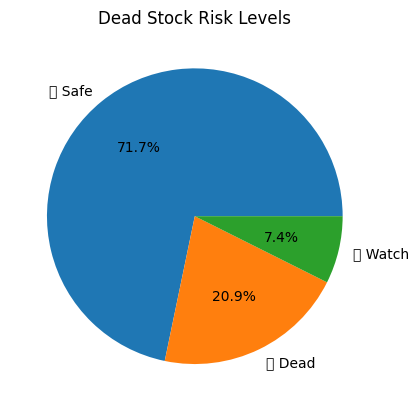

In [21]:
# Risk distribution chart
import matplotlib.pyplot as plt
df['risk_level'] = pd.cut(df['dead_stock_risk'], bins=[0,0.3,0.6,1], labels=['🟢 Safe','🟡 Watch','🔴 Dead'])
print(df['risk_level'].value_counts())
df['risk_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Dead Stock Risk Levels')
plt.ylabel('')
plt.show()


In [22]:
# TOP 5 RISKY ITEMS (Your hackathon money shot)
risky = df[df['dead_stock_risk'] > 0.8][['product_id', 'category', 'days_in_stock',
                                         'weekly_sales_30d', 'locked_capital', 'dead_stock_risk']].head(5)

risky['sales_wk'] = risky['weekly_sales_30d'].astype(str) + '/wk'
risky['money_locked'] = '₹' + risky['locked_capital'].round(0).astype(str).str.replace('.0','')
risky['risk_pct'] = (risky['dead_stock_risk']*100).round(0).astype(str) + '%'
risky_display = risky[['product_id', 'category', 'days_in_stock', 'sales_wk',
                      'money_locked', 'risk_pct']]

print("JUDGE READY TABLE:")
print(risky_display.to_string(index=False))


JUDGE READY TABLE:
product_id   category  days_in_stock sales_wk money_locked risk_pct
     P0068 Painkiller            132    18/wk       ₹23661    90.0%
     P0213 Antibiotic            198    15/wk       ₹39223    90.0%
     P0331 Antibiotic            164    19/wk       ₹31449    90.0%
     P0334 Painkiller             99    18/wk       ₹24246    90.0%
     P0457    Vitamin             96    17/wk       ₹41942    90.0%
